# Exercício 4

## Parte 1

### Questão 1

O arquivo 'grafosCinco' carrega 5 redes.

Verificar se essas redes foram criadas com algum dos seguintes algoritmos:

    - Preferential Attachment
    - Small World com parâmetro p baixo
    - Small World com parâmetro p alto

Descreva seus resultados.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
N1 = nx.read_gpickle('net1.el')
N2 = nx.read_gpickle('net2.el')
N3 = nx.read_gpickle('net3.el')
N4 = nx.read_gpickle('net4.el')
N5 = nx.read_gpickle('net5.el')

print(nx.info(N5))

Name: 
Type: Graph
Number of nodes: 750
Number of edges: 1500
Average degree:   4.0000


In [3]:
def length_of_list(list_of_numbers, number):
    x = [i for i in list_of_numbers if i > number]
    return len(x)

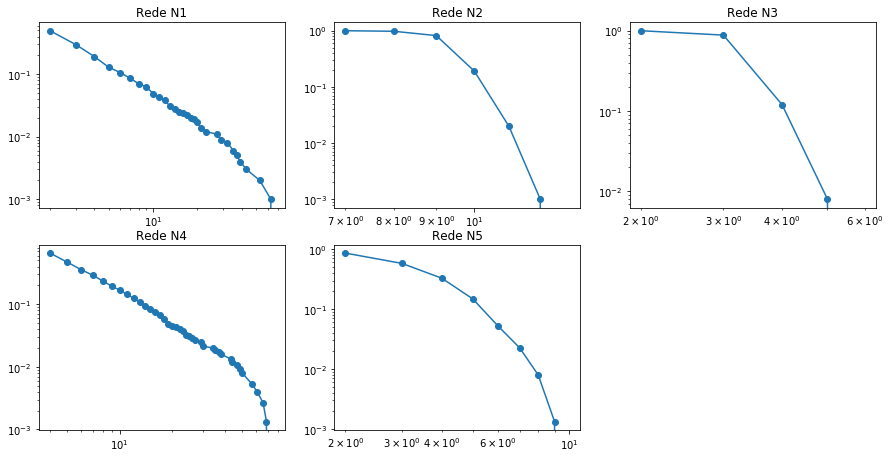

In [4]:
plt.figure(figsize=[15,7.5])
graphs = [N1,N2,N3,N4,N5]
clustering = []
path_length = []
for N, i in zip(graphs, range(1,6)):
    clustering.append(nx.average_clustering(N))
    path_length.append(nx.average_shortest_path_length(N))

    dictlist = []
    px = []

    for key, value in N.degree():
        dictlist.append(value)

    for z in sorted(set(dictlist)):
        px.append(length_of_list(dictlist, z)/len(dictlist))
    plt.subplot(2, 3, i)
    plt.subplot(2,3,i).set_title('Rede N{}'.format(i))
    plt.loglog(sorted(set(dictlist)), px, marker='o')

As redes 1 e 4 são candidatas a serem Preferential Attachment, enquantos as outras certamente não são.

In [5]:
data={'Average Clustering': clustering, 'Average Shortest Path Length': path_length}
pd.DataFrame(data=data, index=['N1', 'N2', 'N3','N4', 'N5'])

,Average Clustering,Average Shortest Path Length
N1,0.024490,4.087379
N2,0.565510,5.106230
N3,0.412222,9.517597
N4,0.034861,3.109946
N5,0.003707,5.074318


Fica claro que as redes N1 e N4 foram construída pelo metódo Preferential Attachment (baixo average clustering e average shortest path length). A rede N5 é do tipo Small World com parâmetro p alto (baixo average clustering). As redes N2 e N3 são do tipo com Small World com parâmetro p baixo (alto average clustering).

In [6]:
respostas = ['Preferential Attachment', 'Small World com parâmetro p baixo', 'Small World com parâmetro p baixo', 
             'Preferential Attachment', 'Small World com parâmetro p alto']
for i in range(0,5):
    print('O metódo de construção da rede N{} é: {}'. format(i+1, respostas[i]))

O metódo de construção da rede N1 é: Preferential Attachment
O metódo de construção da rede N2 é: Small World com parâmetro p baixo
O metódo de construção da rede N3 é: Small World com parâmetro p baixo
O metódo de construção da rede N4 é: Preferential Attachment
O metódo de construção da rede N5 é: Small World com parâmetro p alto
